# Intensity profile

In this notebook we evaluate the spatial beam profile from a camera capture.

In [4]:
import os
import numpy as np
import pandas as pd

from PIL import Image

datadir = '../../dataset/camera'
figuredir = '../../figure/intensity/profile'

os.makedirs(figuredir, exist_ok=True)

from matplotlib import pyplot as plt

# pixel size from datasheet in micrometer
ps = 5.86e-6

# magnification
M = 500 / 4.5

cmap = plt.get_cmap('tab20c')

def read(filepath):
    return np.array(Image.open(filepath))

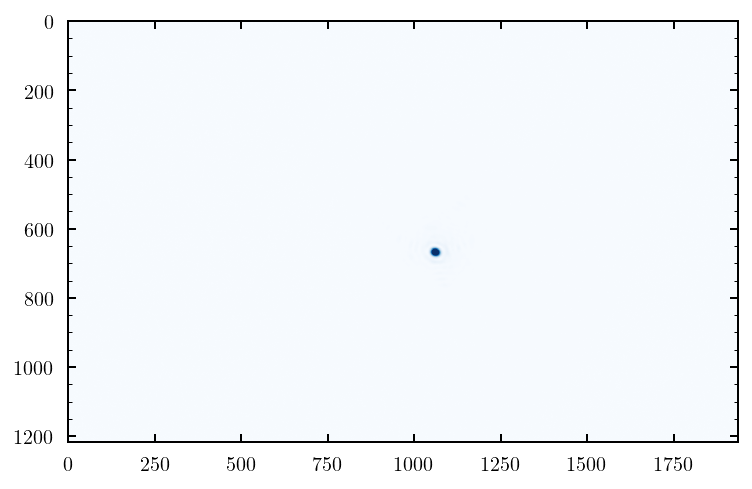

In [2]:
image = read(os.path.join(datadir, 'dot.tif'))

plt.imshow(image)
plt.show()

In [3]:
i, j = np.argwhere(image == image.max()).mean(axis=0).round().astype(int)

l = 50

patch = image[i-l:i+l, j-l:j+l] / image.max()
h, w = patch.shape

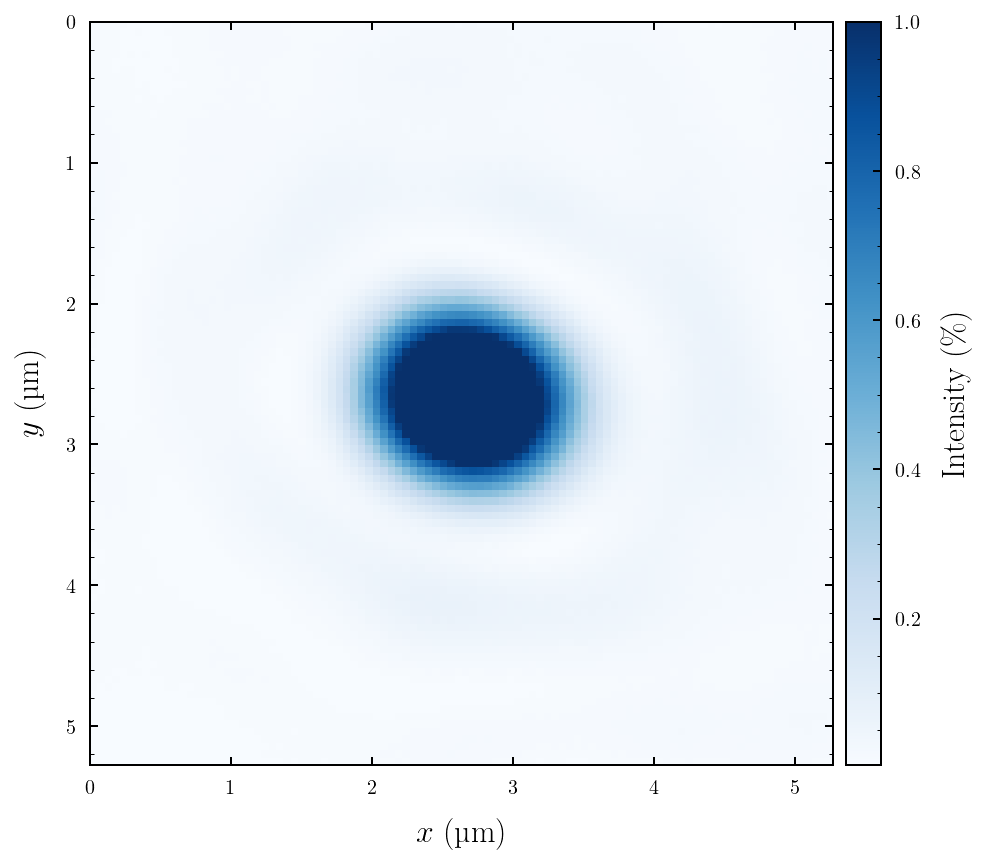

In [8]:
fig = plt.figure(figsize=(12, 6))

plt.imshow(patch, interpolation='none', extent=[0, w*ps / M / 1e-6, h*ps / M / 1e-6, 0])
plt.xlabel('$x$ (\si{\micro\meter})')
plt.ylabel('$y$ (\si{\micro\meter})')

plt.subplots_adjust(top=.98, bottom=.12, right=.83)
plt.colorbar(label=r'Intensity (\si{\percent})', cax=plt.axes([0.70, 0.12, 0.02, .86]))
plt.savefig(os.path.join(figuredir, 'image.pgf'))
plt.savefig(os.path.join(figuredir, 'image.pdf'))
plt.show()

In [9]:
from scipy import optimize

def gaussian(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

def fit(func, x, y, p0):
    p, _ = optimize.curve_fit(func, x, y, p0)
    
    return func(x, *p)

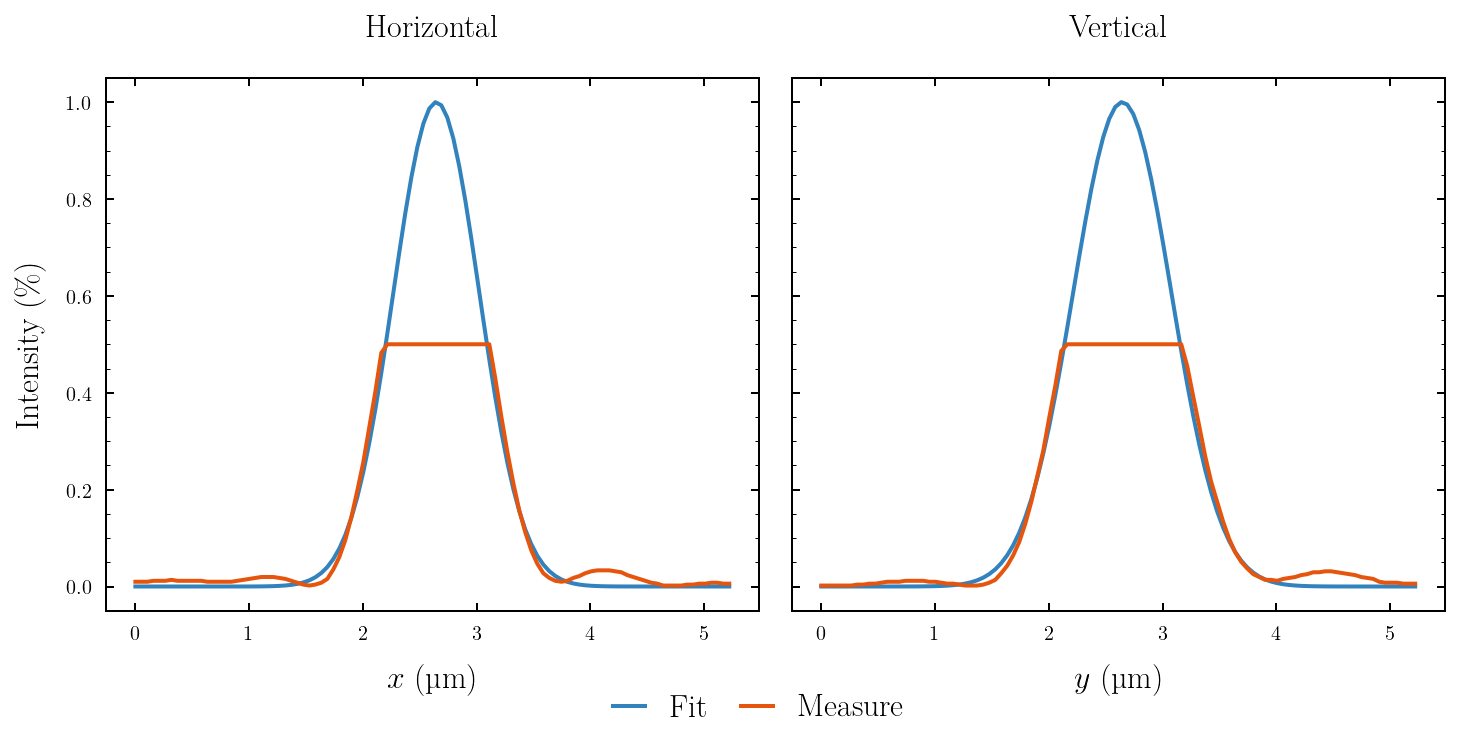

In [13]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 5))

x = ps*np.arange(0, w) / 1e-6
y = ps*np.arange(0, h) / 1e-6

a = patch[:, w // 2]
b = patch[h // 2, :]

#u = fit(gaussian, x, a, [1.4, 300, 100])
#v = fit(gaussian, y, b, [1.4, 300, 100])
u = gaussian(x, 2.0, 294, 42)
v = gaussian(y, 2.0, 294, 48)

vmax = np.min([u.max(), v.max()])

axes[0].plot(x / M, u / vmax, label='Fit', color=cmap.colors[0])
axes[0].plot(x / M, a / vmax, label='Measure', color=cmap.colors[4])

axes[0].set_title('Horizontal')
axes[0].set_xlabel('$x$ (\si{\micro\meter})')
axes[0].set_ylabel('Intensity (\si{\percent})')

axes[1].plot(y / M, v / vmax, label='Fit', color=cmap.colors[0])
axes[1].plot(y / M, b / vmax, label='Measure', color=cmap.colors[4])
axes[1].set_title('Vertical')
axes[1].set_xlabel('$y$ (\si{\micro\meter})')

axes[0].legend(loc='upper center', bbox_to_anchor=(1, -0.1), ncol=2)

plt.subplots_adjust(top=.90, bottom=.16, wspace=.05)
plt.savefig(os.path.join(figuredir, 'profile.pgf'))
plt.savefig(os.path.join(figuredir, 'profile.pdf'))
plt.show()